In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
import GPyOpt
import sys
from matplotlib.collections import EllipseCollection

%matplotlib inline

In [2]:
observations = pd.read_csv('observations/observations.csv')

In [3]:
observations.tail(10)

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones
1610,3.6,1.8,0.900000,1.000000,12.000000,10.000000,8.374288,169.0,164.0
1611,3.6,1.8,0.900000,1.000000,12.000000,10.000000,12.898512,146.0,144.0
1612,3.6,1.8,0.900000,1.000000,7.848115,12.000000,15.000000,173.0,168.0
1613,3.6,1.8,0.900000,1.233278,8.040339,11.133969,7.566286,160.0,157.0
1614,3.6,1.8,1.768691,1.727580,4.833175,10.566780,13.716033,156.0,153.0
1615,3.6,1.8,2.384888,2.410366,6.422656,10.000000,6.547389,162.0,155.0
1616,3.6,1.8,0.900000,1.000000,8.739767,10.000000,10.868873,160.0,156.0
1617,3.6,1.8,0.900000,3.591697,6.047118,12.000000,6.530585,135.0,134.0
1618,3.6,1.8,4.500000,1.341527,5.765610,10.000000,5.000000,172.0,168.0
1619,3.6,1.8,1.092567,2.423684,2.791100,11.756037,10.236167,152.0,146.0


In [4]:
observations['objective'] = observations['reco_passed_no_clones'] / 500

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

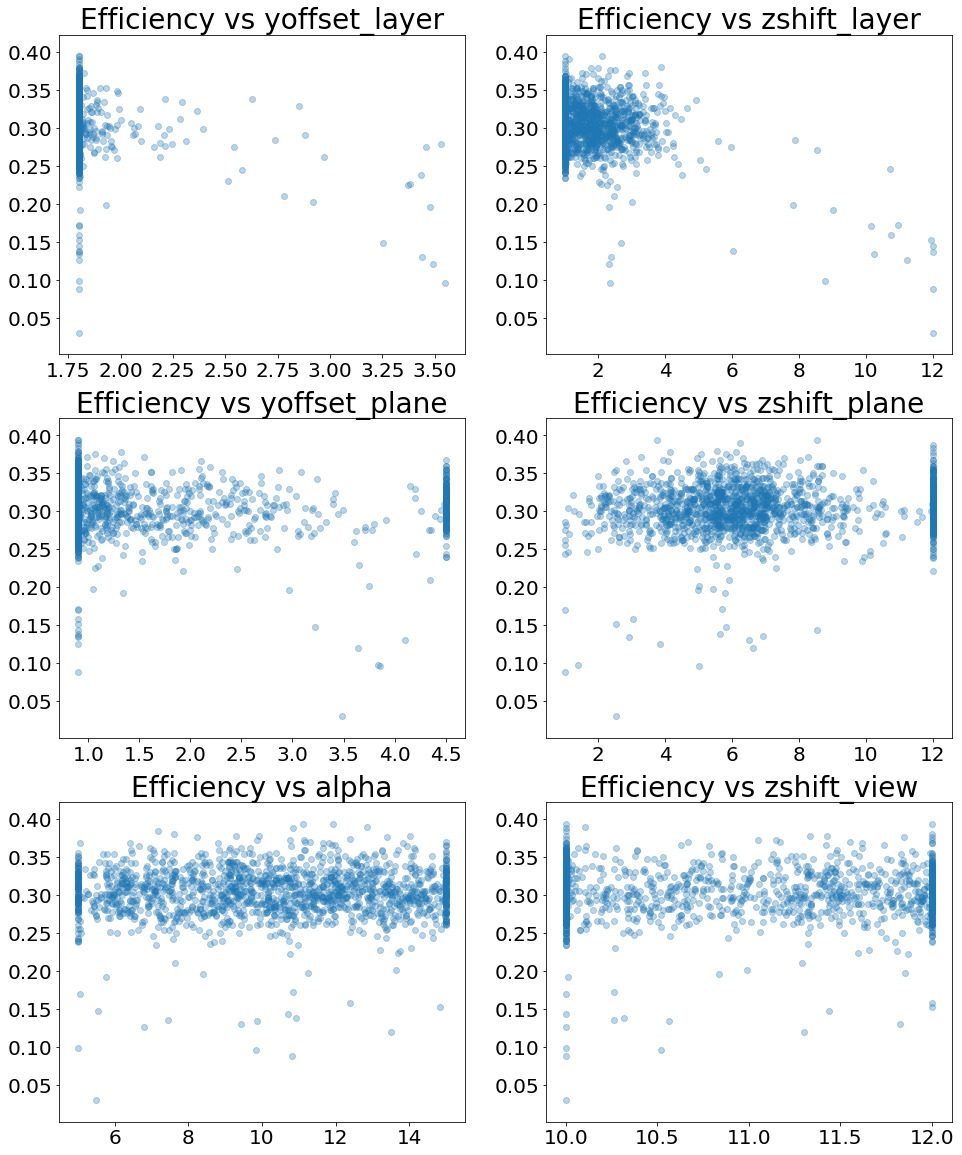

In [5]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
plt.title('Efficiency vs yoffset_layer', fontsize=28)
plt.scatter(observations.yoffset_layer[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 2)
plt.title('Efficiency vs zshift_layer', fontsize=28)
plt.scatter(observations.zshift_layer[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 3)
plt.title('Efficiency vs yoffset_plane', fontsize=28)
plt.scatter(observations.yoffset_plane[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 4)
plt.title('Efficiency vs zshift_plane', fontsize=28)
plt.scatter(observations.zshift_plane[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 5)
plt.title('Efficiency vs alpha', fontsize=28)
plt.scatter(observations.alpha[:], observations.objective[:], alpha=0.3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 6)
plt.title('Efficiency vs zshift_view', fontsize=28)
plt.scatter(observations.zshift_view[:], observations.objective[:], alpha=0.3)
plt.xticks(np.linspace(10, 12, 5), fontsize=20)
plt.yticks(fontsize=20)

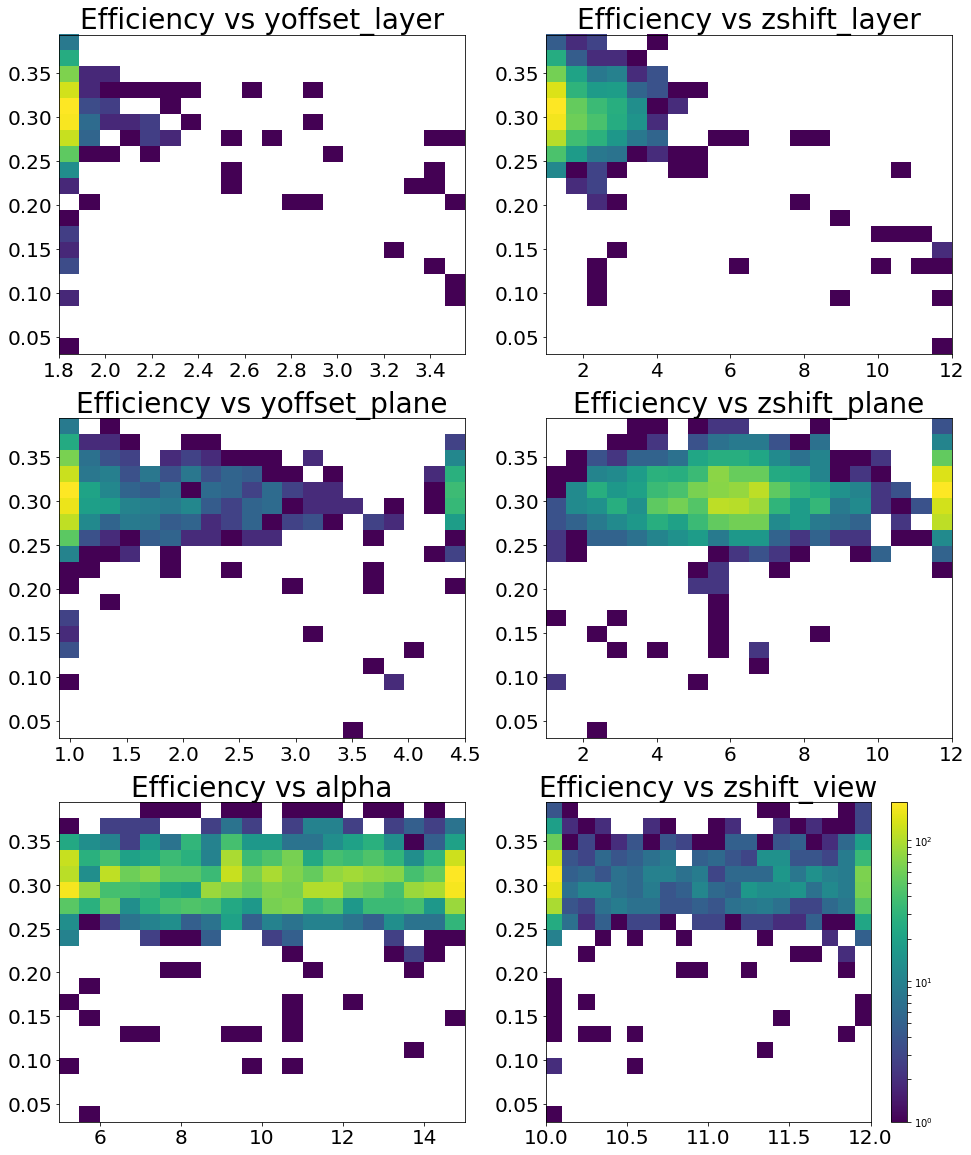

In [6]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
plt.title('Efficiency vs yoffset_layer', fontsize=28)
plt.hist2d(observations.dropna().yoffset_layer[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 2)
plt.title('Efficiency vs zshift_layer', fontsize=28)
plt.hist2d(observations.dropna().zshift_layer[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 3)
plt.title('Efficiency vs yoffset_plane', fontsize=28)
plt.hist2d(observations.dropna().yoffset_plane[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 4)
plt.title('Efficiency vs zshift_plane', fontsize=28)
plt.hist2d(observations.dropna().zshift_plane[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 5)
plt.title('Efficiency vs alpha', fontsize=28)
plt.hist2d(observations.dropna().alpha[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3, 2, 6)
plt.title('Efficiency vs zshift_view', fontsize=28)
plt.hist2d(observations.dropna().zshift_view[:], observations.dropna().objective[:], bins=20, norm=LogNorm())
plt.xticks(np.linspace(10, 12, 5), fontsize=20)
plt.yticks(fontsize=20)
plt.colorbar()

In [7]:
np.linspace(10, 12, 5)

array([10. , 10.5, 11. , 11.5, 12. ])

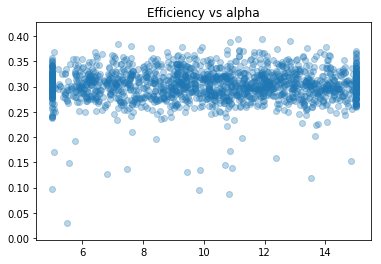

In [8]:
plt.title('Efficiency vs alpha')
plt.scatter(observations.alpha[:], observations.objective[:], alpha=0.3)

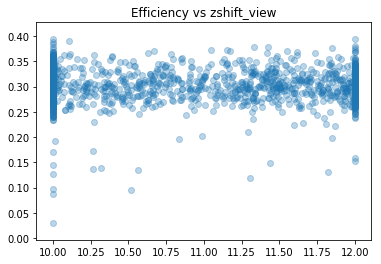

In [9]:
plt.title('Efficiency vs zshift_view')
plt.scatter(observations.zshift_view[:], observations.objective[:], alpha=0.3)

In [10]:
def plot_view(x, length=5):
    
    plt.figure(figsize=(9, 16))
    pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = x
    radius = 43.
    for plane in [0, 1]:
        for layer in [0, 1]:
            
            zs = np.array([zshift_layer * layer + zshift_plane * plane] * length)
            ys = np.cumsum([pitch] * length) - pitch + yoffset_layer * layer + yoffset_plane * plane
            plt.scatter(zs, ys, s=np.pi * radius**2, facecolor='none', edgecolors='blue')
#     plt.scatter([0], [0.5], color='red')
#     plt.scatter([0], [0], color='green')
    plt.scatter([-0.5], [-0.5], color='white')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis("off")
    plt.show()

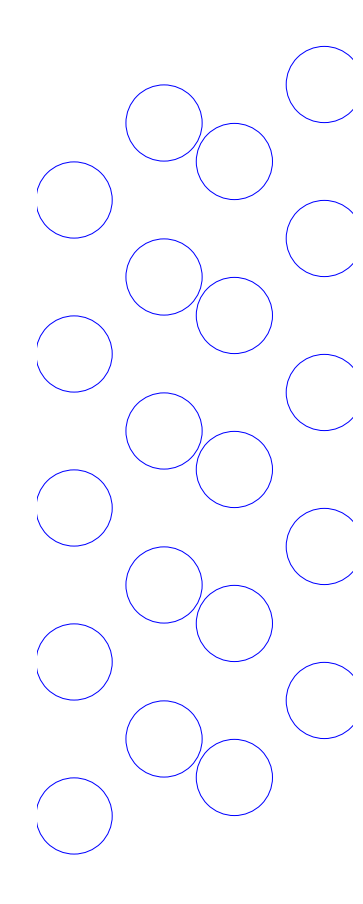

In [11]:
plot_view([  3.6       ,   1.8       ,   0.9       ,   2.10253988,
         3.74674817,  12.        ,  11.11504111        ])

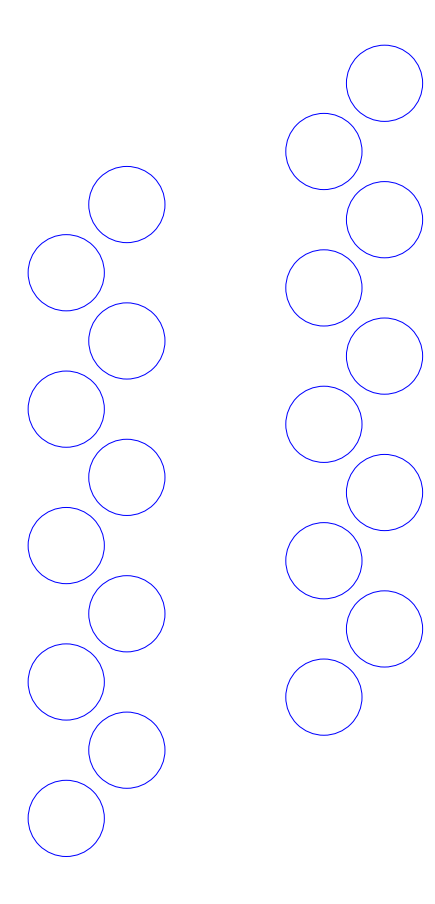

In [12]:
plot_view([  3.6       ,   1.8       ,   3.2,   1.6       ,
         6.8       ,  10.        ,   5.        ])

# Repeat Daniel pics

Fit GP model:

In [13]:
design = observations.dropna()[observations.columns[:-3]].values
#because we want to maximize
answers = -observations.dropna()[observations.columns[-1:]].values

kernel = GPy.kern.RBF(input_dim=7)
m = GPy.models.GPRegression(design, answers, kernel)

In [14]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    04s61  0006  -2.314225e+03   4.605568e+06 
    14s80  0020  -3.462657e+03   1.388559e+00 
    18s39  0025  -3.462658e+03   2.491552e-06 
Runtime:     18s39
Optimization status: Converged



In [15]:
values = m.predict(design)

In [16]:
arm = np.array(values)[0].argmin()
arm

155

In [17]:
m.predict_noiseless(design[arm].reshape(1, -1))

(array([[-0.31090348]]), array([[2.70608873e-05]]))

In [18]:
print(values[0][arm], values[1][arm])

[-0.31090348] [0.00077217]


In [19]:
design[arm]

array([ 3.6       ,  1.8       ,  4.5       ,  1.        ,  8.59877115,
       10.        ,  5.        ])

Fit GGPM model:

In [20]:
design = observations.dropna()[observations.columns[:-3]].values
trials = np.array([[500]] * len(design))
y = observations.dropna()[['reco_passed_no_clones']].values

kernel = GPy.kern.RBF(input_dim=7)
ggpm = GPy.core.GP(design, y, kernel=kernel, 
                   Y_metadata={'trials': trials},
                   inference_method=GPy.inference.latent_function_inference.laplace.Laplace(),
                   likelihood=GPy.likelihoods.Binomial())

In [21]:
ggpm.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    27s10  0004   6.801926e+03   8.622888e+03 
 01m18s51  0011   6.721793e+03   1.125188e-01 
 01m48s22  0015   6.721775e+03   1.566757e-05 
Runtime:  01m48s22
Optimization status: Converged



In [22]:
lik = GPy.likelihoods.Bernoulli()
values = lik.gp_link.transf(ggpm._raw_predict(design)[0])

In [23]:
arm = np.array(values).argmax()
arm

86

In [24]:
values[arm]

array([0.31771126])

In [25]:
design[arm]

array([ 3.6       ,  1.8       ,  4.5       ,  2.25398148,  4.98573016,
       10.        ,  5.        ])

In [26]:
pitch, yoffset_layer, yoffset_plane, zshift_layer, zshift_plane, zshift_view, alpha = design[arm]
    
cmd = "/opt/disney-run.sh python /opt/objective.py --pitch "+str(pitch)+" --yoffset_layer "+str(yoffset_layer)+\
    " --yoffset_plane "+str(yoffset_plane)+" --zshift_layer "+str(zshift_layer)+" --zshift_plane "+\
    str(zshift_plane)+" --zshift_view "+str(zshift_view)+" --alpha "+str(int(alpha))+\
    " --nEvents 5000 --method FH"

In [27]:
cmd

'/opt/disney-run.sh python /opt/objective.py --pitch 3.6 --yoffset_layer 1.8 --yoffset_plane 4.5 --zshift_layer 2.253981478412842 --zshift_plane 4.985730159628287 --zshift_view 10.0 --alpha 5 --nEvents 5000 --method FH'

In [28]:
df_tmp = pd.DataFrame(columns=observations.columns[1:7])
df_tmp.loc[0] = design[arm][1:]

In [29]:
df_tmp

,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha
0,1.8,4.5,2.253981,4.98573,10.0,5.0


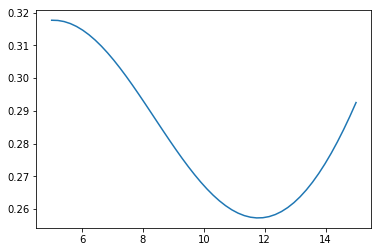

In [30]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, -1] = np.linspace(5, 15, 50)
plt.plot(np.linspace(5, 15, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

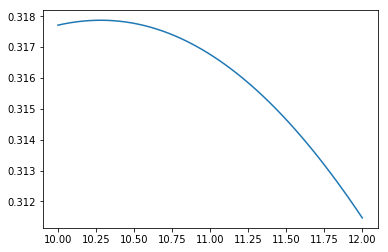

In [31]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, -2] = np.linspace(10, 12, 50)
plt.plot(np.linspace(10, 12, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

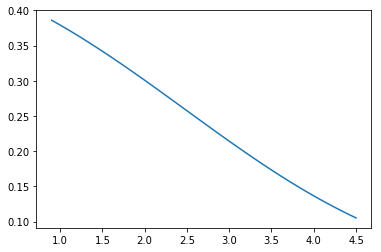

In [32]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, 1] = np.linspace(0.9, 4.5, 50)
plt.plot(np.linspace(0.9, 4.5, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

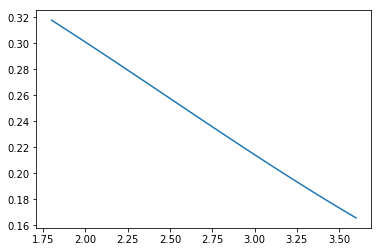

In [33]:
best_point = design[arm]
arr = np.array([best_point] * 50)
arr[:, 1] = np.linspace(1.8, 3.6, 50)
plt.plot(np.linspace(1.8, 3.6, 50), lik.gp_link.transf(ggpm._raw_predict(arr)[0]))

In [34]:
best_point = design[arm]
arr = np.array([best_point] * 10000)
z_layer = np.linspace(np.sqrt(-(3.6-1.8)**2+2**2), 3, 100)
z_plane = np.linspace(2.9,7.1, 100)
z_layer, z_plane = np.meshgrid(z_layer, z_plane)
grid = np.dstack([z_layer, z_plane]).reshape(10000, 2)
arr[:, 3:5] = grid

In [35]:
argmax = np.argmax(lik.gp_link.transf(ggpm._raw_predict(arr)[0]))
best_point = arr[argmax][3:5]

In [36]:
lik.gp_link.transf(ggpm._raw_predict(arr[argmax].reshape(1, -1))[0])

array([[0.31897051]])

In [37]:
#lik.gp_link.transf(ggpm._raw_predict(best_point.reshape(1, -1))[0])

Text(0.5,1,'Ratio of reconstructed events')

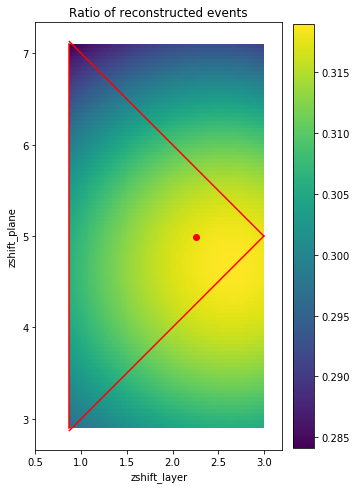

In [38]:
plt.figure(figsize=(5, 10))
pic = plt.imshow(lik.gp_link.transf(ggpm._raw_predict(arr)[0]).reshape(100, 100), extent=[np.sqrt(-(3.6-1.8)**2+2**2), 3,\
                                                                                    2.9, 7.1])
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),3]), np.array([np.sqrt(-(3.6-1.8)**2+2**2),3])+2, c='red')
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),3]), -np.array([np.sqrt(-(3.6-1.8)**2+2**2),3])+8, c='red')
plt.plot(np.array([np.sqrt(-(3.6-1.8)**2+2**2),np.sqrt(-(3.6-1.8)**2+2**2)]), [2.9,7.1], c='red')
plt.colorbar(pic, fraction=0.076, pad=0.04)
plt.xlim([0.5, 3.2])
plt.scatter([2.25398148], [4.98573016], c='red')
plt.xlabel('zshift_layer')
plt.ylabel('zshift_plane')
plt.title('Ratio of reconstructed events')
# plt.scatter([best_point[0]], [best_point[1]], c='blue')

In [39]:
# np.sqrt(-(3.6-1.8)**2+2**2)<z_layer
# np.sqrt(-(1.8-4.5)**2+2**2)+z_plane<z_layer
# z_plane+z_layer<10-2
# z_layer<z_plane-2

# New figures

In [40]:
observations.shape

(1620, 10)

In [41]:
observations.head()

,pitch,yoffset_layer,yoffset_plane,zshift_layer,zshift_plane,zshift_view,alpha,reconstructible,reco_passed_no_clones,objective
0,3.6,3.436777,1.128810,2.210571,6.893522,11.797108,8.701587,157.0,119.0,0.238
1,3.6,3.491098,3.638826,2.318519,6.633024,11.303923,13.511367,135.0,60.0,0.120
2,3.6,1.934191,1.723673,1.566266,6.826156,11.784093,8.594912,155.0,145.0,0.290
3,3.6,3.372442,2.453974,2.263205,4.947135,11.594591,13.698964,135.0,112.0,0.224
4,3.6,3.251162,3.225302,2.697990,5.830484,11.440073,5.547616,147.0,74.0,0.148


In [42]:
errors = []
estimated_objectives = []
best_points = []

step_size = 400
X = np.arange(220, 1620+step_size, step_size)

for step in X:
    design = observations.dropna()[observations.columns[:-3]].values[:step]
    #because we want to maximize
    answers = -observations.dropna()[observations.columns[-1:]].values[:step]

    kernel = GPy.kern.RBF(input_dim=7, variance=1., lengthscale=1.)
    m = GPy.models.GPRegression(design, answers, kernel, noise_var=10**-10)
    m.optimize(messages=False)
    m.optimize_restarts(num_restarts = 1)

    #values = m.predict_noiseless(design)
    values = m.predict(design)
    arm = np.array(values)[0].argmin()
    
    errors.append(values[1][arm][0])
    best_points.append(arm)
    estimated_objectives.append(values[0][arm][0])
    print(step)

Optimization restart 1/1, f = 30.55436056092576
220
Optimization restart 1/1, f = -1280.0166276808009
620
Optimization restart 1/1, f = -2154.521900393237
1020
Optimization restart 1/1, f = -3040.1828965517184
1420
Optimization restart 1/1, f = -3462.658034467173
1820


In [43]:
values[0][arm][0]

-0.31089614235118784

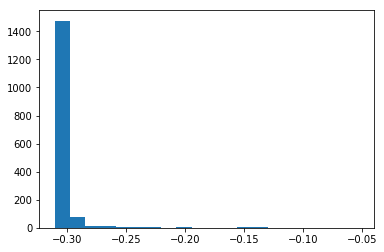

In [44]:
plt.hist(np.array(values)[0], bins=20)
plt.show()

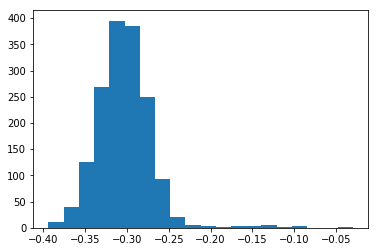

In [45]:
plt.hist(answers, bins=20)
plt.show()

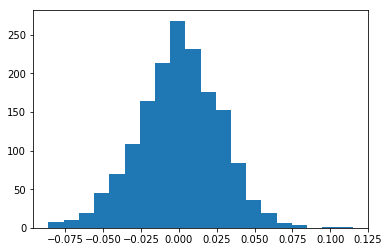

In [46]:
plt.hist(answers-np.array(values)[0], bins=20)
plt.show()

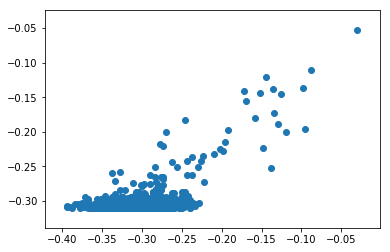

In [47]:
plt.scatter(answers, np.array(values)[0])
plt.show()

In [48]:
#errors = np.concatenate(tuple(errors))
#estimated_objectives = np.concatenate(tuple(estimated_objectives))
#best_points = np.concatenate(tuple(best_points))

Text(0.5,0,'iteration')

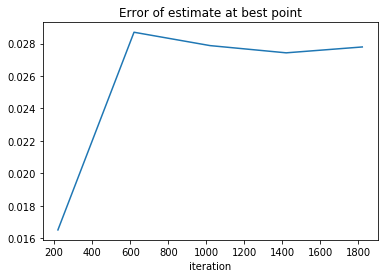

In [49]:
plt.plot(X, np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')

Text(0.5,0,'iteration')

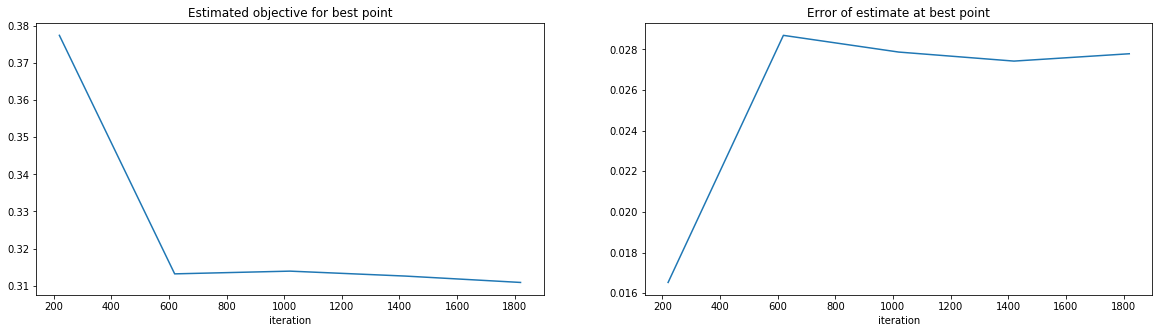

In [50]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(X, -np.array(estimated_objectives))
plt.title('Estimated objective for best point')
plt.xlabel('iteration')
plt.subplot(1, 2, 2)
plt.plot(X, np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')

In [51]:
objectives = observations.dropna()['objective'].values
best_values = [objectives[0]]
for i in range(1, len(objectives)):
    obj = objectives[i]
    if obj > best_values[-1]:
        best_values.append(obj)
    else:
        best_values.append(best_values[-1])

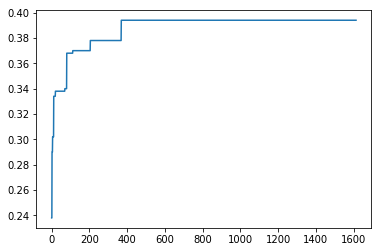

In [52]:
plt.plot(best_values)
plt.show()

In [53]:
from sklearn.gaussian_process import GaussianProcessRegressor

reg = GaussianProcessRegressor(normalize_y=False, n_restarts_optimizer=0, alpha=10**-10)
XX = observations.dropna()[observations.columns[:-3]].values
yy = -observations.dropna()[observations.columns[-1]].values
reg.fit(XX, yy)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [54]:
reg.score(XX, yy)

0.8973820027024585

In [55]:
yy_pred, sigma = reg.predict(XX, return_std=True)

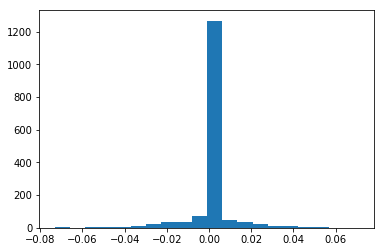

In [56]:
plt.hist(yy-yy_pred, bins=20)
plt.show()

In [57]:
sigma[yy_pred.argmin()]

0.0

In [58]:
yy_pred.min()

-0.3939998608548194

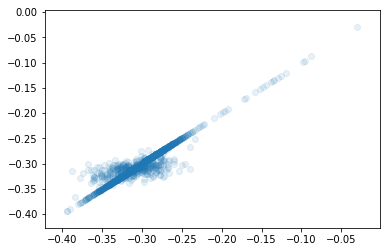

In [59]:
plt.scatter(yy, yy_pred, alpha=0.1)
plt.show()

In [60]:
XX = observations.dropna()[observations.columns[:-3]].values
yy = -observations.dropna()[observations.columns[-1]].values
indexes = np.arange(len(XX))
Y_true = []
Y_pred = []
step_size = 100
X2 = np.arange(0, 1600+step_size, step_size)


for i in X2:
    sel = (indexes != i)
    
    reg = GaussianProcessRegressor(normalize_y=False, n_restarts_optimizer=0)
    reg.fit(XX[sel], yy[sel])
    
    y_true = yy[i]
    y_pred = reg.predict(XX[[i], :])[0]
    
    Y_true += [y_true]
    Y_pred += [y_pred]

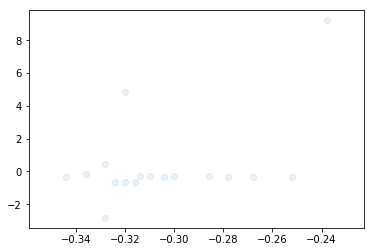

In [61]:
plt.scatter(Y_true, Y_pred, alpha=0.1)
plt.show()

In [62]:
errors = []
estimated_objectives = []
best_points = []

step_size = 100
X = np.arange(20, 1620+step_size, step_size)

for step in X:
    design = observations.dropna()[observations.columns[:-3]].values[:step]
    #because we want to maximize
    answers = -observations.dropna()[observations.columns[-1:]].values[:step]

    reg = GaussianProcessRegressor(normalize_y=False, n_restarts_optimizer=0, alpha=10**-10)
    reg.fit(design, answers)

    yy_pred, sigma = reg.predict(design, return_std=True)
    arm = yy_pred.argmin()
    
    errors.append(sigma[arm])
    best_points.append(arm)
    estimated_objectives.append(yy_pred[arm])
    print(step)

20
120
220
320
420
520
620
720
820
920
1020
1120
1220
1320
1420
1520
1620


Text(0.5,0,'iteration')

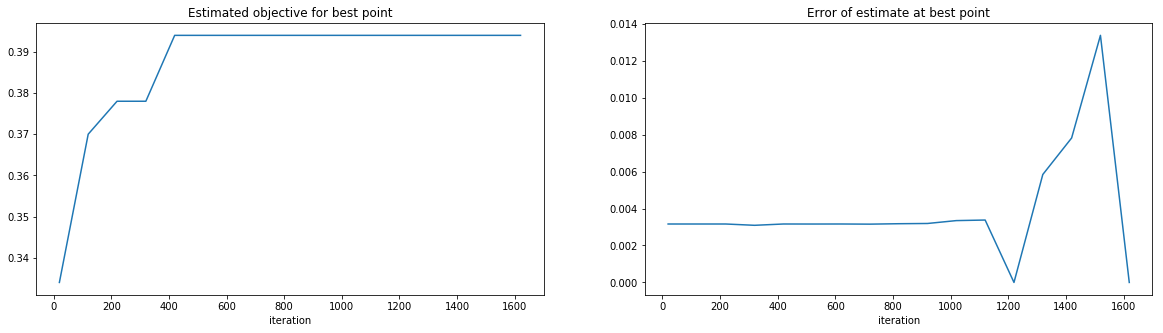

In [63]:

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(X, -np.array(estimated_objectives))
plt.title('Estimated objective for best point')
plt.xlabel('iteration')
plt.subplot(1, 2, 2)
plt.plot(X, np.sqrt(errors))
plt.title('Error of estimate at best point')
plt.xlabel('iteration')